<a href="https://colab.research.google.com/github/dnnxl/ML-Notes/blob/master/Regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
4. Support Vector for Regression (SVR)
5. Decision Tree Classification
6. Random Forest Classification

Linear 1, 2, 3 
No linear 5, 6
No linear or linear SVR

>## Simple linear regression

\begin{equation*}
y = b_0 + b_1  \cdot  x_1
\end{equation*}

y: Dependent variable, somethig you're trying to explain for instance
<br>
x: Independent variable, assuming that it is causing the depende variable to change

- Find a line that best fit the data
- Using the minimum sum square

\begin{equation*}
SUM(y-\dot{y})^2 -> Min
\end{equation*}

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer # Contains methods, classes to preprocess
from sklearn.model_selection  import train_test_split # Split the data into training and test set

# Importing the dataset
dataset = pd.read_csv("Salary_Data.csv")

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [3]:
# A specific library will do the the feature scaling for us
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Learn the correlations
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
pd.DataFrame({"Y Predict":y_pred, "Y Test":y_test})

,Y Predict,Y Test
0,40835.105909,37731.0
1,123079.399408,122391.0
2,65134.556261,57081.0
3,63265.367772,63218.0
4,115602.645454,116969.0
5,108125.891499,109431.0
6,116537.239698,112635.0
7,64199.962017,55794.0
8,76349.687193,83088.0
9,100649.137545,101302.0


In [5]:
pd.DataFrame(X_test)

,0
0,1.5
1,10.3
2,4.1
3,3.9
4,9.5
5,8.7
6,9.6
7,4.0
8,5.3
9,7.9


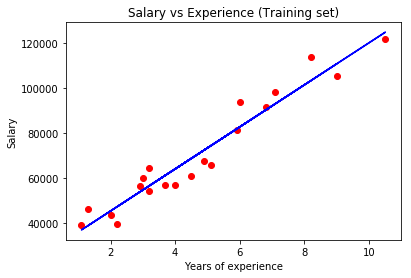

In [6]:
# Visualising the Trainig set results
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

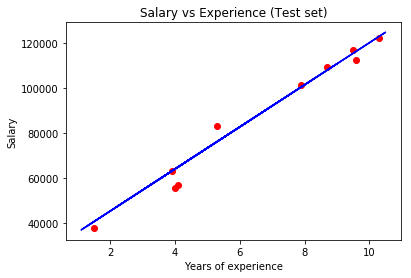

In [7]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

Some assumptions of a Linear Regression: https://previa.uclm.es/profesorado/raulmmartin/Estadistica/PracticasSPSS/Supuestos_del_modelo_de_regresion_lineal.pdf

>## Multiple linear regression

**Building A Model**

5 Methods of building models:

1. All -in
2. Backward Elimination
3. Forward Selection
4. Bidirectional Elimination
5. Score Comparison

Stepwise regression (2, 3, 4)

** Backward Elimination**
- Step 1: Select a significance level to stay in the model (e.g. SL = 0.05)
- Step 2: Fit the full model with all possible predictors
- Step 3: Consider the predictor with the higest P-Value. If P > SL, go to STEP 4, otherwise go to FIN
- Step 4: Remove the predictor
- Step 5: Fit the model without the variable.

**Forward Selection**
- Select a significance level to enter the model (e.g. SL = 0.05)
- Fit all simple regression models y ~ $x_n$ Select the one with the lowest P-Value
- Keep this variable and fit all possible models one extra predictor added to the ones you already have
- Consider the predicto with the lowest P-Value. If P < SL, go to STEP 3, otherwise go to FIN 

**Bidirectional ELimination**
- Select a significance level to enter and to stay in the model e.g. SLENTER = 0.05, SSTAY = 0.05
- Perform the next step of Foward Selection (new variables must have : P < SLENTER to enter)
- Perform ALL steps of Backward Elimination(old variables must have P < SLSTAY to stay)
- No new variables can enter and no old variables can exit

**All possible Models**
- Select a criterion of goodness of fit (e.g. Akaike criterion)
- Construct All possible Regression Models $2^{N} - 1$ total combinations
- Select the one with the best criterion

**Python implement**

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder # Contains methods, classes to preprocess
from sklearn.model_selection  import train_test_split # Split the data into training and test set
from sklearn.linear_model import LinearRegression # Linear regresion
# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values

# Encoding categorical data
# Encoding the independent variable
labelEncoder_X = LabelEncoder()
X[:,3] = labelEncoder_X.fit_transform(X[:, 3])
oneHotEncoder = OneHotEncoder(categorical_features = [3])
X = oneHotEncoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =1/5, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
pd.DataFrame(dataset)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
pd.DataFrame(X_test)

,0,1,2,3,4
0,1.0,0.0,66051.52,182645.56,118148.20
1,0.0,0.0,100671.96,91790.61,249744.55
2,1.0,0.0,101913.08,110594.11,229160.95
3,1.0,0.0,27892.92,84710.77,164470.71
4,1.0,0.0,153441.51,101145.55,407934.54
5,0.0,1.0,72107.60,127864.55,353183.81
6,0.0,1.0,20229.59,65947.93,185265.10
7,0.0,1.0,61136.38,152701.92,88218.23
8,1.0,0.0,73994.56,122782.75,303319.26
9,1.0,0.0,142107.34,91391.77,366168.42


In [12]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting the Test set result
y_pred = regressor.predict(X_test)
pd.DataFrame({"Y Prediction":y_pred, "Real Y value":y_test})

,Y Prediction,Real Y value
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


**Backward Elimination Multiple Linear Regression**

In [0]:
#Building the optimal model using Backward Elimination
import statsmodels.regression.linear_model as sm

X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

In [19]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,1.0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,1.0,0.0,142107.34,91391.77,366168.42
5,1.0,1.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,1.0,1.0,1.0,0.0,130298.13,145530.06,323876.68
8,1.0,1.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,1.0,0.0,0.0,123334.88,108679.17,304981.62


In [20]:
#Backward elimination
X_opt = X[:, [0,1,2,3,4,5]]
pd.DataFrame(X_opt)

,0,1,2,3,4,5
0,1.0,1.0,0.0,1.0,165349.20,136897.80
1,1.0,1.0,0.0,0.0,162597.70,151377.59
2,1.0,1.0,1.0,0.0,153441.51,101145.55
3,1.0,1.0,0.0,1.0,144372.41,118671.85
4,1.0,1.0,1.0,0.0,142107.34,91391.77
5,1.0,1.0,0.0,1.0,131876.90,99814.71
6,1.0,1.0,0.0,0.0,134615.46,147198.87
7,1.0,1.0,1.0,0.0,130298.13,145530.06
8,1.0,1.0,0.0,1.0,120542.52,148718.95
9,1.0,1.0,0.0,0.0,123334.88,108679.17


In [21]:
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit() # 2
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           2.90e-28
Time:                        04:57:49   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.73e+04   3185.530      8.571      0.000    2.09e+04    3.37e+04
x1           2.73e+04   3185.530      8.571      0.000    2.09e+04    3.37e+04
x2          1091.1075   3377.087      0.323      0.748   -5710.695    7892.910
x3           -39.3434   3309.047     -0.012      0.991   -6704.106    6625.420
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     8.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
X_opt = X[:, [0, 3]]
pd.DataFrame(X_opt)
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit() # 2
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sat, 31 Aug 2019   Prob (F-statistic):              0.829
Time:                        04:57:55   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
x1          2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

## Polynomial Regression

In [0]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder # Contains methods, classes to preprocess
from sklearn.model_selection  import train_test_split # Split the data into training and test set
from sklearn.linear_model import LinearRegression # Linear regresion
from sklearn.preprocessing import PolynomialFeatures

# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")

In [0]:
pd.DataFrame(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [0]:
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

Text(0.5, 0, 'Position Level')

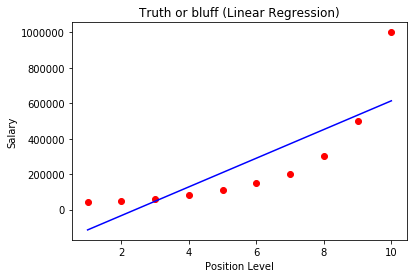

In [47]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
y_predict = lin_reg.predict(X)

plt.scatter(X, Y, color = "red")
plt.plot(X, y_predict, color = "blue")
plt.title("Truth or bluff (Linear Regression)")
plt.ylabel("Salary")
plt.xlabel("Position Level")

In [0]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [49]:
pd.DataFrame(X_poly)

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0
5,1.0,6.0,36.0,216.0
6,1.0,7.0,49.0,343.0
7,1.0,8.0,64.0,512.0
8,1.0,9.0,81.0,729.0
9,1.0,10.0,100.0,1000.0


In [50]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'Position Level')

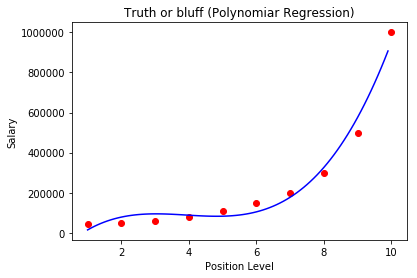

In [51]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Truth or bluff (Polynomiar Regression)")
plt.ylabel("Salary")
plt.xlabel("Position Level")

In [52]:
# Predicting a new result with Linear Regression
lin_reg.predict(np.array([6.5]).reshape(1, 1))

array([330378.78787879])

In [54]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([133259.46969697])

<br>

## Support Vector Regression

- Support Vector Machines support linear and nonlinear regression that we can refer to as SVR
- Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVR tries to fit as many instances as possible on the street while limiting margin violations
- The width of the street is controlled by a hyper parameter Epsilon.

>**Introduction**
<BR>
Support Vector Machine are perhaps one of the most popular and talked about machine learning algorithms.They were extremely popular around the time they were developed in the 1990s and continue to be the go-to method for a high performing algorithm with little tuning.

> **What is SVM ?**
<BR>
Support vector machines so called as SVM is a supervised learning algorithm which can be used for classification and regression problems as support vector classification (SVC) and support vector regression (SVR). It is used for smaller dataset as it takes too long to process. In this set, we will be focusing on SVC.

> **The ideology behind SVM**
<BR>
SVM is based on the idea of finding a hyperplane that best separates the features into different domains.

> **Intuition development**
<BR>
Basically, SVM is composed of the idea of coming up with an Optimal hyperplane which will clearly classify the different classes(in this case they are binary classes).

> **Terminologies used in SVM**
<BR>
The points closest to the hyperplane are called as the support vector points and the distance of the vectors from the hyperplane are called the margins.

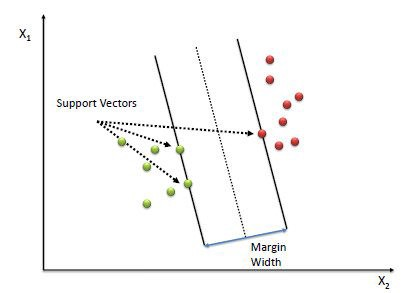

In [57]:
Image("SVM.jpg")

> The basic intuition to develop over here is that more the farther SV points, from the hyperplane, more is the probability of correctly classifying the points in their respective region or classes. SV points are very critical in determining the hyperplane because if the position of the vectors changes the hyperplane’s position is altered. Technically this hyperplane can also be called as margin maximizing hyperplane.

> **Hyperplane**
<BR>
The hyperplane is a function which is used to differentiate between features. In 2-D, the function used to classify between features is a line whereas, the function used to classify the features in a 3-D is called as a plane similarly the function which classifies the point in higher dimension is called as a hyperplane. Now since you know about the hyperplane lets move back to SVM.

<BR>
Let’s say there are “m” dimensions:

thus the equation of the hyperplane in the ‘M’ dimension can be given as =



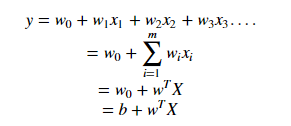

In [58]:
Image("Ecuation.png")

> **Hard margin SVM**
<BR>
Assume 3 hyperplanes namely (π, π+, π−) such that ‘π+’ is parallel to ‘π’ passing through the support vectors on the positive side and ‘π−’ is parallel to ‘π’ passing through the support vectors on the negative side.

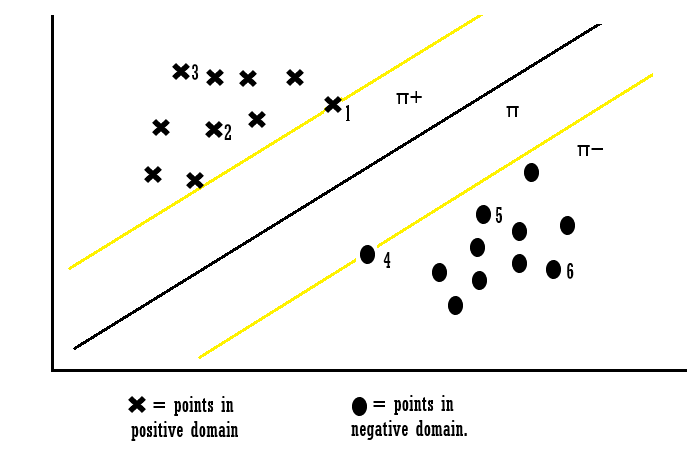

In [59]:
Image("Hyperplane.png")

the equations of each hyperplane can be considered as:

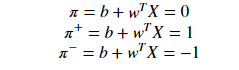

In [60]:
Image("ne.png")

for the point X1 :

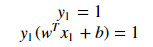

In [61]:
Image("na.png")

Explanation: when the point X1 we can say that point lies on the hyperplane and the equation determines that the product of our actual output and the hyperplane equation is 1 which means the point is correctly classified in the positive domain.

for the point X3:

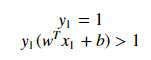

In [62]:
Image("ni.png")

Explanation: when the point X3 we can say that point lies away from the hyperplane and the equation determines that the product of our actual output and the hyperplane equation is greater 1 which means the point is correctly classified in the positive domain.


for the point X4:

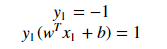

In [63]:
Image("p4.png")

Explanation: when the point X4 we can say that point lies on the hyperplane in the negative region and the equation determines that the product of our actual output and the hyperplane equation is equal to 1 which means the point is correctly classified in the negative domain.

for the point X6 :

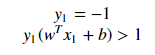

In [64]:
Image("p6.png")

Explanation: when the point X6 we can say that point lies away from the hyperplane in the negative region and the equation determines that the product of our actual output and the hyperplane equation is greater 1 which means the point is correctly classified in the negative domain.

**Note:**  Maximize the margin p, and Minimize ||w||

Link:
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

<BR>

**Implementation in python**

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_

[170370.0204065]


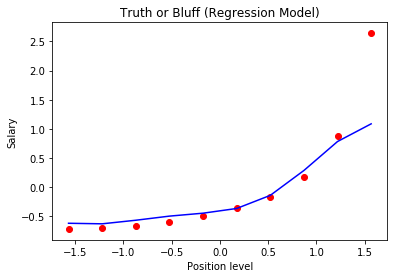

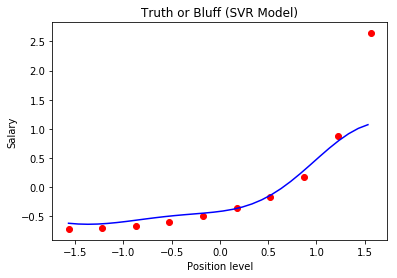

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('SVR/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

# Predicting a new result
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<BR>

## Decision Tree Regression

**CART**: Classification and regression trees

- **Entropy**: Is the measures of impurity, disorder or uncertainty in a bunch of examples. Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.

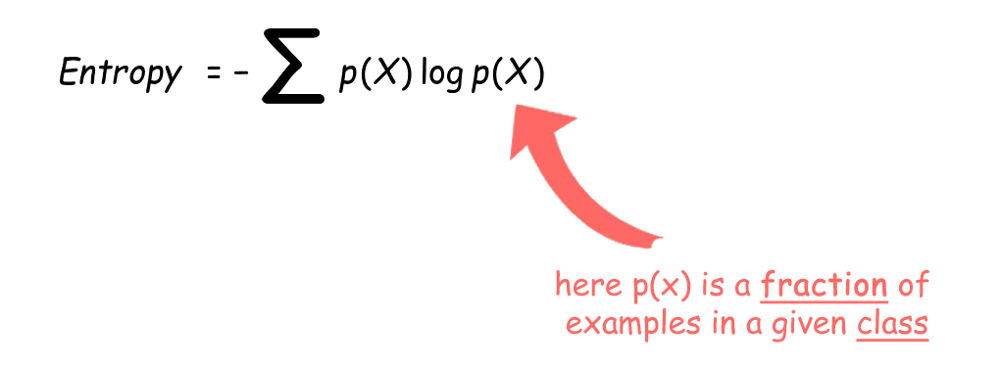

In [65]:
Image("Entropy_ecuation.png")

> **Gain**: Measures how much “information” a feature gives us about the class.
<BR>
**Why it matter ?**
- **Information gain** is the main key that is used by Decision Tree Algorithms to construct a Decision Tree.
- **Decision Trees** algorithm will always tries to maximize Information gain.
- An **attribute** with highest **Information gain** will tested/split first.
- **Decision Tree Algorithm** choose the highest Information gain to split/construct a Decision Tree. So we need to check all the feature in order to split the Tree.

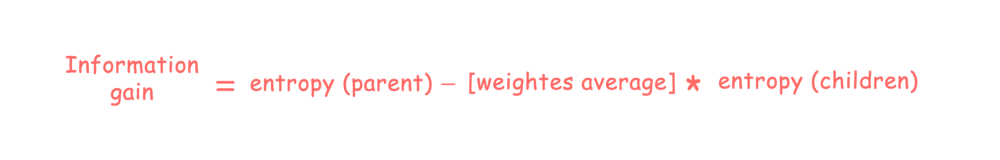

In [66]:
Image("Gain_ecuation.png")

**Python implement**

[1.27807446e+10]


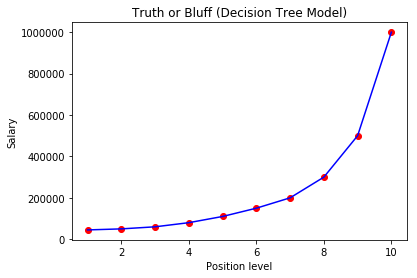

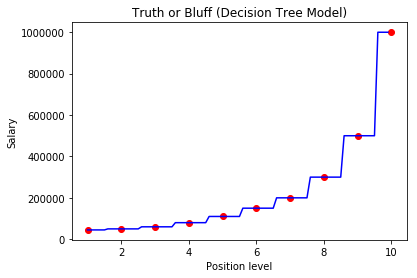

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Decision_Tree_Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

"""
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
"""
# Fitting the Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Desicion trees results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<BR>

## Random Forest

**Ensemble Learning**
<br>
Is when you take multiple algorithms or tha same algorithm multiple times and you put them together to make something much ore powerful than the original.

**Algorithm:**

1. Pick at random K data points from the Trainning set
2. Build the Decision Tree associated to these K data points.
3. Choose the number Ntree of trees you want to build and repeat STEPS 1 & 2
4. For a new data point, make each one of your Ntree trees predict the value of Y to for the data point in question, and assign the new data point the average across all of the predicted Y values.

Advantages:
- Both classification and the regression task
- Handle the missing values and maintains accuracy for missing data
- Won't overfit the model
- Handle large data set with higher dimenionality

Disadvantages
- Good job at classification but not as good as for regression
- A little control on what the model does


**Python implement**

[160333.33333333]


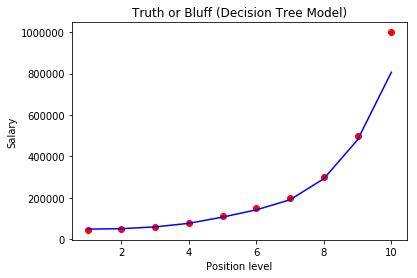

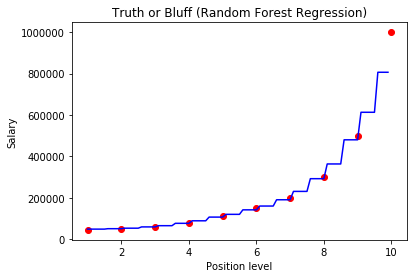

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Random_Forest_Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

"""
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
"""
# Fitting the Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict([[6.5]])
print(y_pred)

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Desicion trees results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


<BR>

## Evaluating Regression Models Performance

> ### R Squared Intuition

$SS_{res} = SUM(y_i - y_{i}^{*})^{2}$
<img src="Images\SS_res.png">
<br>
$SS_{tot} = SUM(y_i - y_{avg})^{2}$
<img src="Images\SS_ave.png">
<br>

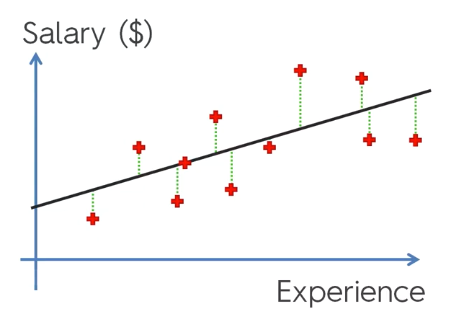

In [67]:
Image("SS_res.png")

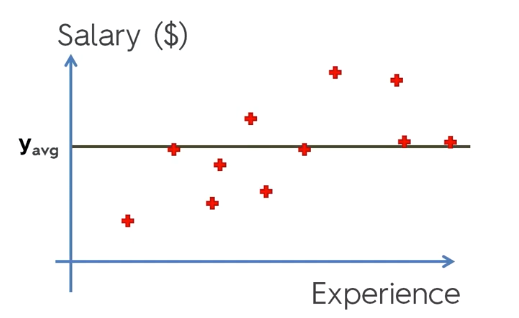

In [68]:
Image("SS_ave.png")

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$
<BR>
The closest to 1 or -1, is the better line

<BR>

## Adjusted $R^{2}$

Adj $R^{2} = 1 - (1-R^{2}) \frac{n-1}{n-p-1}$
<BR>
p - number of regressors (independent variable)
<br>
n - sample size

<BR>
How well is your model fitter to the data